In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [118]:
# loading the dataset from scikit-learn
# Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

data = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data = np.c_[data['data'], data['target']],columns = list(data['feature_names']) + ['target'])

In [119]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [120]:
# Display the dataframe info()

df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [121]:
# Display the missing values

df_cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [122]:
X = df_cancer.drop('target', axis=1)
Y = df_cancer.target

## Splitting the dataset

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
tree_model = DecisionTreeClassifier(random_state = 1)
tree_model.fit(df_cancer.drop('target',axis = 1), df_cancer.target)

DecisionTreeClassifier(random_state=1)

### We dont have any categorical data in our dataset so we dont need to use encoder to convert it into numerical values. 

(array([ 18., 120., 160.,  83.,  25.,   9.,   8.,   1.,   1.,   1.]),
 array([0.1565 , 0.20723, 0.25796, 0.30869, 0.35942, 0.41015, 0.46088,
        0.51161, 0.56234, 0.61307, 0.6638 ]),
 <a list of 10 Patch objects>)

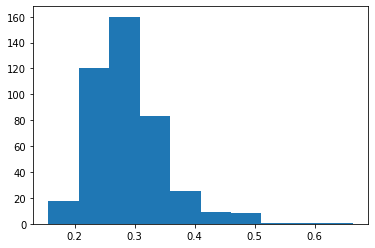

In [124]:
plt.hist(X_train['worst symmetry'])

## Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0)
lg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [127]:
y_predict_logistic = lg.predict(X_test)

#### Confusion metrix -

In [128]:
from sklearn.metrics import confusion_matrix
CM_logistic = confusion_matrix(Y_test, y_predict_logistic)

In [129]:
CM_logistic

array([[50,  3],
       [ 3, 87]], dtype=int64)

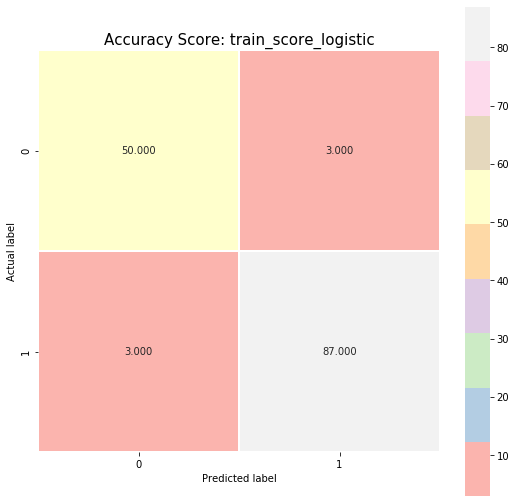

In [130]:
plt.figure(figsize=(9,9))
sns.heatmap(CM_logistic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('train_score_logistic')
plt.title(all_sample_title, size = 15);
plt.draw()

In [131]:
from sklearn.metrics import accuracy_score
train_score_logistic = accuracy_score(Y_test, y_predict_logistic) 

In [132]:
train_score_logistic

0.958041958041958

## 2. K-Nearest Neighbors

In [133]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [134]:
y_predict_KNN = KNN.predict(X_test)

#### Confusion metrix -

In [135]:
from sklearn.metrics import confusion_matrix
CM_KNN = confusion_matrix(Y_test, y_predict_KNN)

In [136]:
train_score_KNN = accuracy_score(Y_test, y_predict_KNN) 

In [137]:
train_score_KNN

0.951048951048951

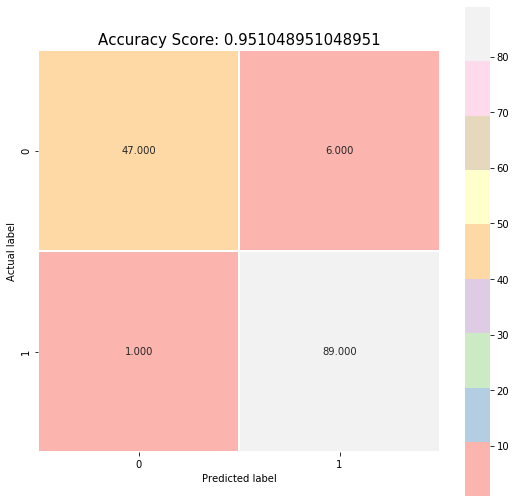

In [138]:
plt.figure(figsize=(9,9))
sns.heatmap(CM_KNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(train_score_KNN)
plt.title(all_sample_title, size = 15);
plt.draw()

## 3. Decision Tree

In [139]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [140]:
y_predict_decision = DecisionTree.predict(X_test)

#### Confusion metrix -

In [141]:
CM_tree = confusion_matrix(Y_test, y_predict_decision)

In [142]:
train_score_tree = accuracy_score(Y_test, y_predict_decision) 

In [143]:
train_score_tree

0.958041958041958

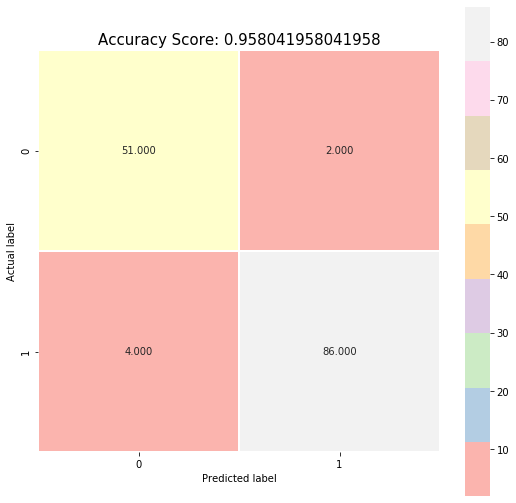

In [144]:
plt.figure(figsize=(9,9))
sns.heatmap(CM_tree, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(train_score_tree)
plt.title(all_sample_title, size = 15);
plt.draw()

In [145]:
'''from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree, 
                   feature_names=X_train,  
                   class_names=str(Y_test), filled=True)'''

'from sklearn import tree\nfig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(DecisionTree, \n                   feature_names=X_train,  \n                   class_names=str(Y_test), filled=True)'

## 4. Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [147]:
y_predict_random = random_forest.predict(X_test)

#### Confusion metrix -

In [148]:
CM_random = confusion_matrix(Y_test, y_predict_random)

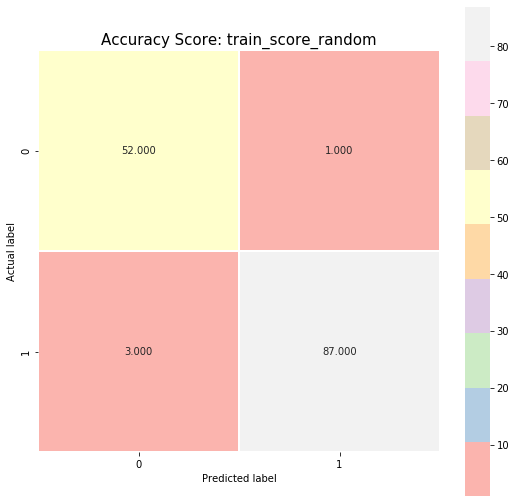

In [149]:
plt.figure(figsize=(9,9))
sns.heatmap(CM_random, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('train_score_random')
plt.title(all_sample_title, size = 15);
plt.draw()

In [150]:
train_score_random = accuracy_score(Y_test, y_predict_random) 

In [151]:
train_score_random

0.972027972027972

In [152]:
from sklearn.model_selection import cross_val_score

## Testing scores of each model - Results

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
for classifiers, label in zip([lg, KNN, DecisionTree, random_forest], ['Logistic Regression', 'KNN', 'Decison Tree', 'Random Forest']):
  scores = cross_val_score(classifiers, X_test, Y_test, scoring='accuracy', cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.96 (+/- 0.03) [Logistic Regression]
Accuracy: 0.94 (+/- 0.02) [KNN]
Accuracy: 0.91 (+/- 0.05) [Decison Tree]
Accuracy: 0.94 (+/- 0.05) [Random Forest]


In [155]:
from sklearn import datasets, metrics, model_selection

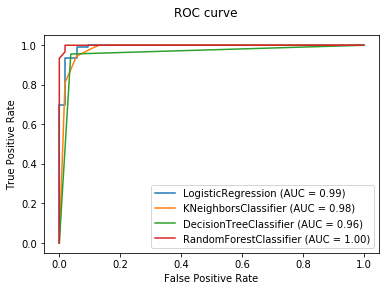

In [156]:
log_disp = metrics.plot_roc_curve(lg, X_test, Y_test) 
KNN_disp = metrics.plot_roc_curve(KNN, X_test, Y_test, ax = log_disp.ax_)
decision_disp = metrics.plot_roc_curve(DecisionTree, X_test, Y_test, ax = log_disp.ax_)
random_disp = metrics.plot_roc_curve(random_forest, X_test, Y_test, ax = log_disp.ax_)
log_disp.figure_.suptitle("ROC curve")
plt.show()